In [91]:
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python'

In [2]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [7]:
def cci(data,time=[]):
    for i in time:
        data["cci_"+str(i)]=ta.CCI(data.high,data.low,data.close,timeperiod=i)
    return data

In [77]:
def cci_graph(data,n=300,intervalo=100):
    data2=data[-n:]
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=2)
    ax2 = plt.subplot2grid((6,1), (2, 0),rowspan=2)
    ax3 = plt.subplot2grid((6,1), (4, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    ax3.axes.get_xaxis().set_visible(False)
    x_axis = data2.index.get_level_values(0)
    g1,=ax1.plot(x_axis,data2['cci_3'],lw=1,label='cci_3',color='black')
    g2,=ax2.plot(x_axis,data2['cci_12'],lw=1,label='cci_12',color='blue')
    g3,=ax3.plot(x_axis,data2['cci_30'],lw=1,label='cci_30',color='green')
    ax3.axhline(y=-intervalo,linewidth=1, color='r',lw=1,linestyle="--")
    ax3.axhline(y=intervalo,linewidth=1, color='r',lw=1,linestyle="--")
    #
    plt.xticks(fontsize=8)
    ax1.legend(loc=1,fontsize=8)
    ax2.legend(loc=1,fontsize=8)
    ax3.legend(loc=1,fontsize=8)
    return plt.show()

In [81]:
# Candlestick graph
def candle_graph_cci(data,n=200,nome_coluna_datas="datetime",intervalo=100):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((6,1), (3, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    ax2.axes.get_xaxis().set_visible(False)
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    #
    ax2.plot(ohlc[nome_coluna_datas], ohlc["cci_30"], color = 'green', lw=1,label="cci")
    ax2.axhline(y=-intervalo,linewidth=1, color='r',lw=1,linestyle="--")
    ax2.axhline(y=intervalo,linewidth=1, color='r',lw=1,linestyle="--")
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    import matplotlib.ticker as ticker
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.xticks(fontsize=8)
    ax1.legend(label="closed")
    ax2.legend(loc=1,fontsize=8)
    return plt.show()

In [89]:
def sinais_cci(data,intervalo=100,time=[]):
    for i in time:
        data["cci_"+str(i)]=ta.CCI(data.high,data.low,data.close,timeperiod=i)
        data["cci_s"+str(i)]=0
        data.loc[(data["cci_"+str(i)].shift(1)<intervalo)&(data["cci_"+str(i)]>intervalo),"cci_s"+str(i)]=1
        data.loc[(data["cci_"+str(i)].shift(1)>-intervalo)&(data["cci_"+str(i)]<-intervalo),"cci_s"+str(i)]=-1
    return data

## Exemplo

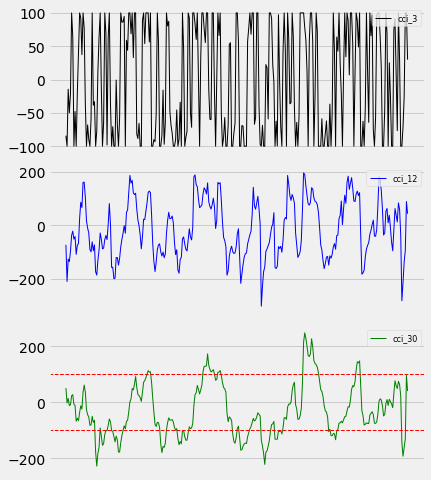

In [79]:
df=cci(data,time=[3,7,12,30])
cci_graph(df)

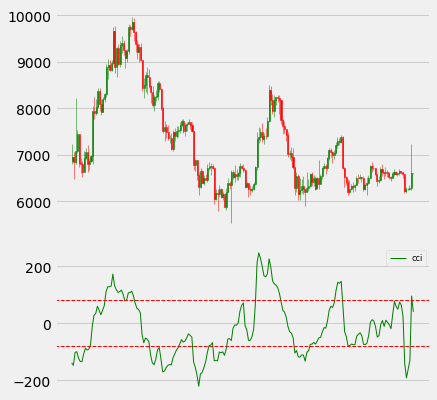

In [82]:
candle_graph_cci(df)

In [90]:
df=sinais_cci(df,time=[15,30,40])
df.tail(3)

,open,high,low,close,volume,cci_3,cci_7,cci_12,cci_15,cci_30,cci_s15,cci_s30,cci_40,cci_s40
datetime,,,,,,,,,,,,,,
2018-10-14,6267.27,6346.56,6247.17,6277.73,2.154229e+08,100.000000,-53.439581,-94.170203,-116.049782,-130.904017,0,0,-106.004378,0
2018-10-15,6277.73,7234.83,6244.77,6612.36,1.190524e+09,100.000000,103.732801,88.405156,100.297913,95.241421,1,0,111.225945,1
2018-10-16,6612.69,6612.99,6583.30,6606.12,8.020117e+06,29.812452,69.438479,42.954985,48.453274,39.798901,0,0,57.040948,0
